<b>Боксплот Тьюки<b>

Необходимо сгенерировать выборки размером 20 и 100 элементов. Построить для них боксплот Тьюки. Для каждого распределения определить долю выбросов экспериментально (сгенерировав выборку, соответсвующую распределению 1000 раз, и вычислив среднюю долю выбросов) и сравнить с результатами, полученными теоретически.

Подключаем все необходимые библиотеки

In [18]:
from scipy.stats import norm, laplace, poisson, cauchy, uniform
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
sizes = [20, 100]
NORMAL, CAUCHY, LAPLACE, POISSON, UNIFORM = "Normal", "Cauchy", "Laplace", "Poisson", "Uniform"
NUMBER_OF_REPETITIONS = 1000
STR_1, STR_2 = 'Доля выбросов выборки из 20 элементов: ', 'Доля выбросов выборки из 100 элементов: '
EXPANSION = '.png'
FILEPATH = 'graphs/'

Функция, вычисляющая длину усов

In [20]:
def mustache(distr):
    q_1, q_3 = np.quantile(distr, [0.25, 0.75])
    return q_1 - 3/2 * (q_3 - q_1), q_3 + 3/2 * (q_3 - q_1)

Функция выдающая количество найденных выбросов

In [21]:
def count_out(distr):
    x1, x2 = mustache(distr)
    filtered = [x for x in distr if x > x2 or x < x1]
    return len(filtered)

Функция, отрисовывающая графики Боксплот Тьюки

In [22]:
def DrawBoxplot(tips, name):
    sns.set_theme(style = "whitegrid")
    sns.boxplot(data = tips, orient = 'h')
    sns.despine(offset = 10)
    plt.xlabel("x")
    plt.ylabel("n")
    plt.title(name)
    plt.savefig(str(FILEPATH) + str(name) + EXPANSION)
    return

Функция вывода ответа на экран

In [23]:
def printAnswer(result):
    print(STR_1 + str(result[0]))
    print(STR_2 + str(result[1]))

Функция построения боксплот Тьюки и высчитывания доли вбросов для нормального распределения

Доля выбросов выборки из 20 элементов: 0.022
Доля выбросов выборки из 100 элементов: 0.01446


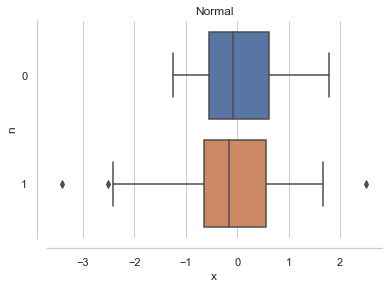

In [24]:
def NormalBT():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distr = norm.rvs(size = size)
            distr.sort()
            count += count_out(distr)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distr = norm.rvs(size = size)
        distr.sort()
        tips.append(distr)
    DrawBoxplot(tips, NORMAL)  
    printAnswer(result)
    return

NormalBT()

Функция построения боксплот Тьюки и высчитывания доли выбросов для распределения Коши

Доля выбросов выборки из 20 элементов: 0.1514
Доля выбросов выборки из 100 элементов: 0.18495


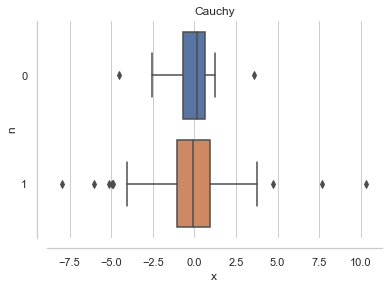

In [29]:
def CauchyBT():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distr = cauchy.rvs(size = size)
            distr.sort()
            count += count_out(distr)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distr = cauchy.rvs(size = size)
        distr.sort()
        tips.append(distr)
    DrawBoxplot(tips, CAUCHY)  
    printAnswer(result)
    return

CauchyBT()

Функция построения боксплот Тьюки и высчитывания доли выбросов для распределения Лапласа

Доля выбросов выборки из 20 элементов: 0.07365
Доля выбросов выборки из 100 элементов: 0.0794


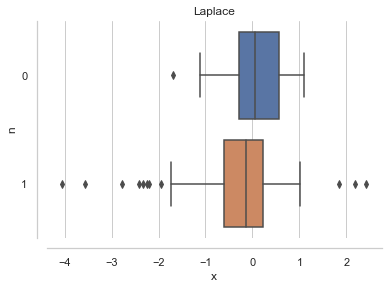

In [30]:
def LaplaceBT():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distr = laplace.rvs(size=size, scale=1 / m.sqrt(2), loc=0)
            distr.sort()
            count += count_out(distr)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distr = laplace.rvs(size = size, scale=1 / m.sqrt(2), loc=0)
        distr.sort()
        tips.append(distr)
    DrawBoxplot(tips, LAPLACE)  
    printAnswer(result)
    return

LaplaceBT()

Функция построения боксплот Тьюки и высчитывания доли выбросов для распределения Пуассона

Доля выбросов выборки из 20 элементов: 0.0247
Доля выбросов выборки из 100 элементов: 0.01575


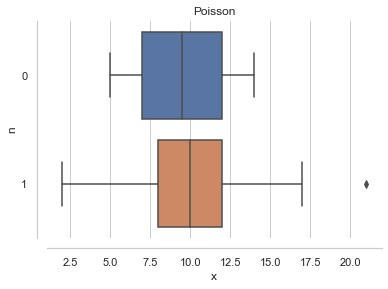

In [31]:
def PoissonBT():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distr = poisson.rvs(10, size=size)
            distr.sort()
            count += count_out(distr)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distr = poisson.rvs(10, size=size)
        distr.sort()
        tips.append(distr)
    DrawBoxplot(tips, POISSON)  
    printAnswer(result)
    return

PoissonBT()

Функция построения боксплот Тьюки и высчитывания доли выбросов для равномерного распределения

Доля выбросов выборки из 20 элементов: 0.00185
Доля выбросов выборки из 100 элементов: 0.00037


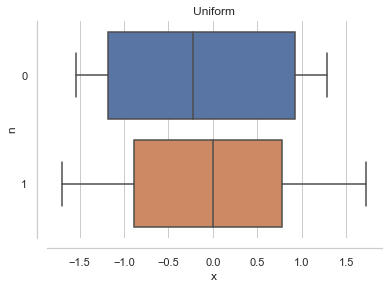

In [32]:
def UniformBT():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distr = uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))
            distr.sort()
            count += count_out(distr)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distr = uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))
        distr.sort()
        tips.append(distr)
    DrawBoxplot(tips, UNIFORM)  
    printAnswer(result)
    return

UniformBT()